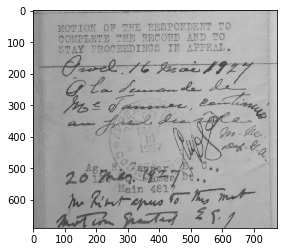

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pic1 = cv2.imread(r'C:\Users\ATHUL VIJAY M P\Desktop\Pattern\simulation5\text1.png')
pic =cv2.cvtColor(pic1, cv2.COLOR_BGR2RGB)
print()
plt.imshow(pic)
plt.show()

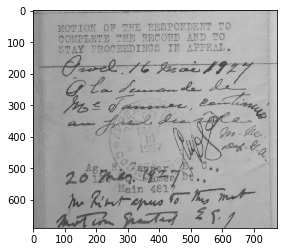

[[[149 149 149]
  [148 148 148]
  [148 148 148]
  ...
  [201 201 201]
  [200 200 200]
  [200 200 200]]

 [[147 147 147]
  [147 147 147]
  [147 147 147]
  ...
  [201 201 201]
  [201 201 201]
  [200 200 200]]

 [[147 147 147]
  [147 147 147]
  [147 147 147]
  ...
  [201 201 201]
  [201 201 201]
  [201 201 201]]

 ...

 [[135 135 135]
  [135 135 135]
  [135 135 135]
  ...
  [182 182 182]
  [182 182 182]
  [183 183 183]]

 [[135 135 135]
  [135 135 135]
  [135 135 135]
  ...
  [182 182 182]
  [182 182 182]
  [183 183 183]]

 [[135 135 135]
  [135 135 135]
  [135 135 135]
  ...
  [181 181 181]
  [182 182 182]
  [182 182 182]]]


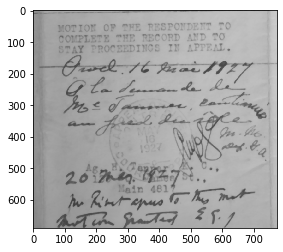

(690, 773, 3)
1600110
[[149 149 149]
 [148 148 148]
 [148 148 148]
 ...
 [181 181 181]
 [182 182 182]
 [182 182 182]]
[[149. 149. 149.]
 [148. 148. 148.]
 [148. 148. 148.]
 ...
 [181. 181. 181.]
 [182. 182. 182.]
 [182. 182. 182.]]
(533370, 3)
[[125 125 125]
 [142 142 142]
 [198 198 198]
 [188 188 188]
 [164 164 164]
 [181 181 181]
 [104 104 104]
 [ 84  84  84]
 [174 174 174]
 [155 155 155]]
[9 1 1 ... 5 5 5]
[[155 155 155]
 [142 142 142]
 [142 142 142]
 ...
 [181 181 181]
 [181 181 181]
 [181 181 181]]
[[[155 155 155]
  [142 142 142]
  [142 142 142]
  ...
  [198 198 198]
  [198 198 198]
  [198 198 198]]

 [[142 142 142]
  [142 142 142]
  [142 142 142]
  ...
  [198 198 198]
  [198 198 198]
  [198 198 198]]

 [[142 142 142]
  [142 142 142]
  [142 142 142]
  ...
  [198 198 198]
  [198 198 198]
  [198 198 198]]

 ...

 [[142 142 142]
  [142 142 142]
  [142 142 142]
  ...
  [181 181 181]
  [181 181 181]
  [181 181 181]]

 [[142 142 142]
  [142 142 142]
  [142 142 142]
  ...
  [181 181 181]

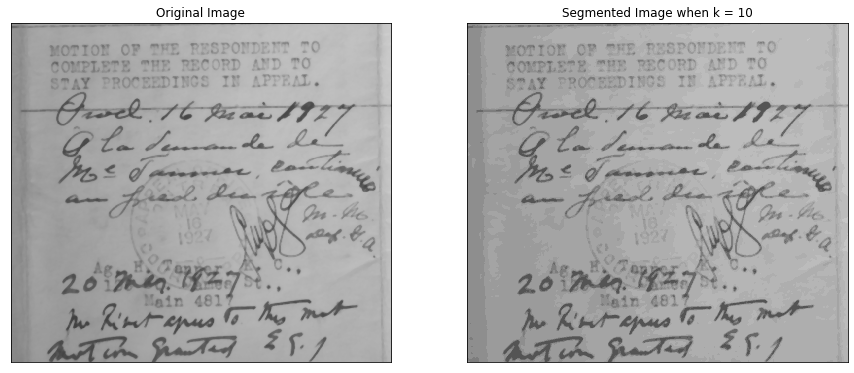

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image=cv2.imread(r'C:\Users\ATHUL VIJAY M P\Desktop\Pattern\simulation5\text1.png')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

image= cv2.medianBlur(image,5)
print(image)
plt.imshow(image)
plt.show()
print(np.shape(image))
print(np.size(image))

x, y, z = image.shape
image_2d = image.reshape(x*y, z)
image_2d.shape
print(image_2d)

image_2d = np.float32(image_2d)
print(image_2d)
print(np.shape(image_2d))
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k =10
_, labels, (centers) = cv2.kmeans(image_2d, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
print(centers)
labels = labels.flatten()
print(labels)

segmented_image = centers[labels.flatten()]
print(segmented_image)

segmented_image = segmented_image.reshape(image.shape)
print(segmented_image)
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(image)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(segmented_image)
plt.title('Segmented Image when k = %i' % k), plt.xticks([]), plt.yticks([])
plt.show()

[3 3 3 ... 9 9 9]
[[173.1863  173.1863  173.1863 ]
 [135.95987 135.95987 135.95987]
 [ 98.15232  98.15232  98.15232]
 [146.80919 146.80919 146.80919]
 [187.9961  187.9961  187.9961 ]
 [157.47116 157.47116 157.47116]
 [117.7503  117.7503  117.7503 ]
 [165.34387 165.34387 165.34387]
 [ 81.46715  81.46715  81.46715]
 [179.9525  179.9525  179.9525 ]]
[[173 173 173]
 [135 135 135]
 [ 98  98  98]
 [146 146 146]
 [187 187 187]
 [157 157 157]
 [117 117 117]
 [165 165 165]
 [ 81  81  81]
 [179 179 179]]
[[3 3 3 ... 4 4 4]
 [3 3 3 ... 4 4 4]
 [3 3 3 ... 4 4 4]
 ...
 [1 1 1 ... 9 9 9]
 [1 1 1 ... 9 9 9]
 [1 1 1 ... 9 9 9]]


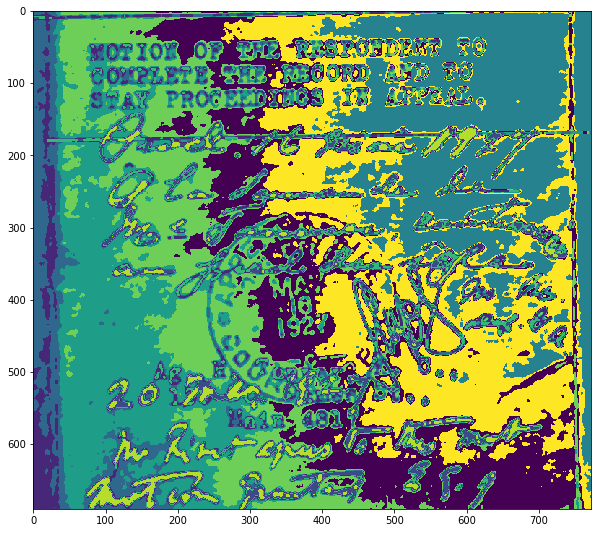

In [2]:
#K MEANS CLUSTERING

from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=10,init='k-means++', n_init=10,max_iter=500, tol=0.0001,random_state=0).fit(image_2d)

labels=kmeans.labels_
centers=kmeans.cluster_centers_

print(labels)
print(centers)


centers = np.uint8(centers)
print(centers)

seg=kmeans.predict(image_2d)
seg=seg.reshape(690, 773)

print(seg)
figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
plt.imshow(seg)
plt.show()

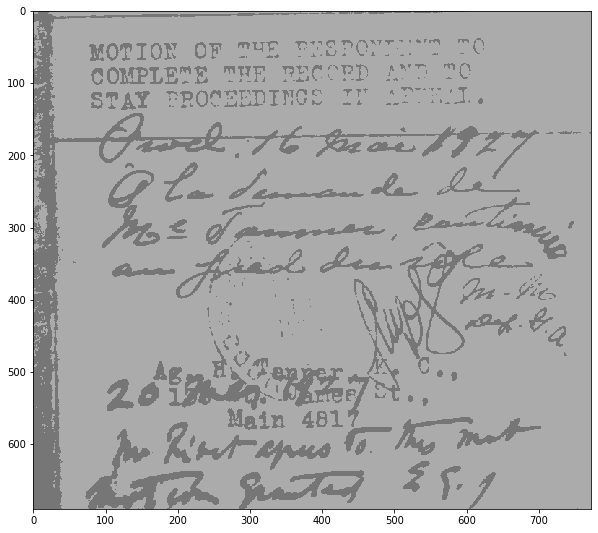

(690, 773, 3)
(533370, 3)
[[171 171 171]
 [171 171 171]
 [171 171 171]
 ...
 [171 171 171]
 [171 171 171]
 [171 171 171]]


In [3]:
# data for gaussian mixture

gaussian_image=segmented_image

figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
plt.imshow(gaussian_image)
plt.show()

print(np.shape(gaussian_image))

x1, y1, z1 = gaussian_image.shape

gauss_2d = gaussian_image.reshape(x1*y1, z1)
print(np.shape(gauss_2d))
print(gauss_2d)

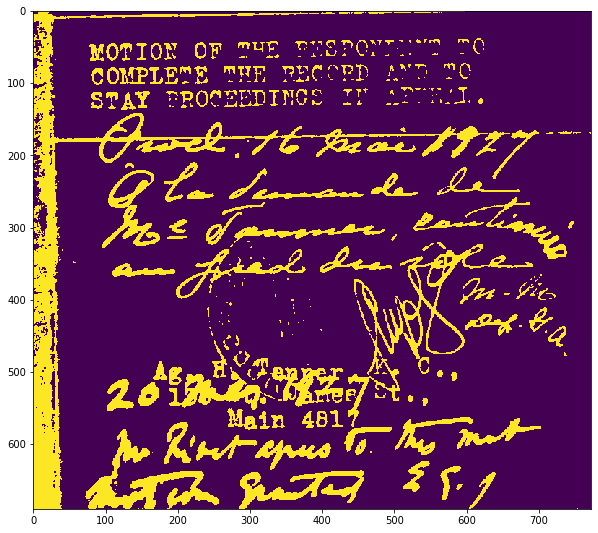

In [4]:
#GAUSSIAN MIXTURE MODEL USING EM on image replotted by kmeans
import sklearn
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=10,covariance_type='tied', tol=0.001, reg_covar=1e-06, max_iter=500,n_init=10, init_params='random', weights_init=None, means_init=None,random_state=None)
gmm = gmm.fit(gauss_2d)

cluster = gmm.predict(gauss_2d)
cluster = cluster.reshape(690, 773)
figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
plt.imshow(cluster)
plt.show()

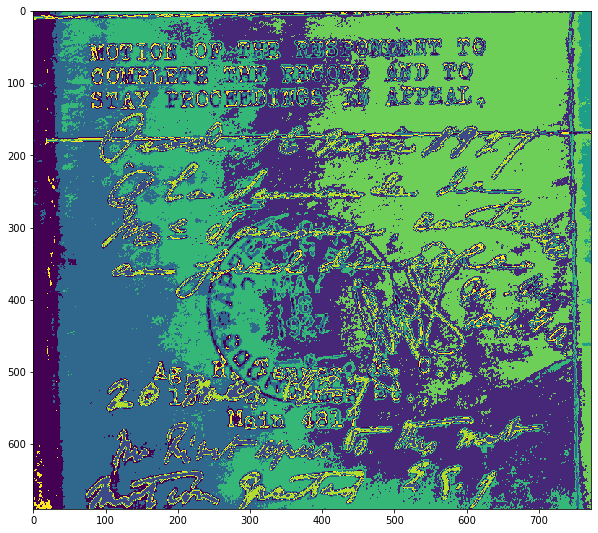

In [6]:
#GAUSSIAN MIXTURE MODEL USING EM on raw data initialized by k means
import sklearn
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=10,covariance_type='tied', tol=0.001, reg_covar=1e-06, max_iter=500,n_init=10, init_params='kmeans', weights_init=None, means_init=None,random_state=None)
gmm = gmm.fit(image_2d)

cluster = gmm.predict(image_2d)
cluster = cluster.reshape(690, 773)
figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
plt.imshow(cluster)
plt.show()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)


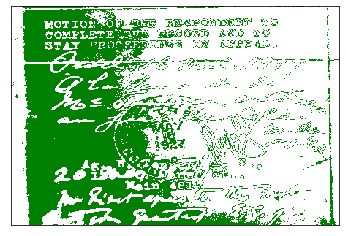

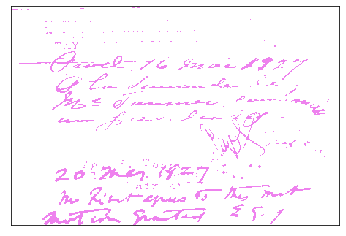

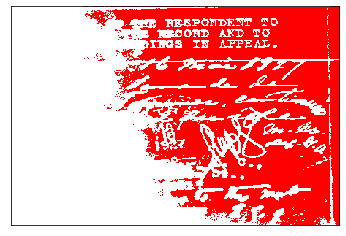

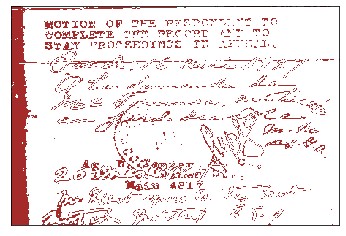

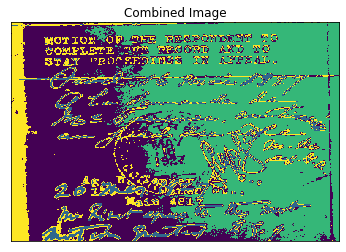

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)


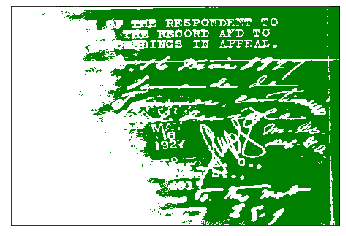

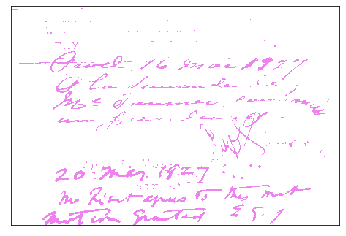

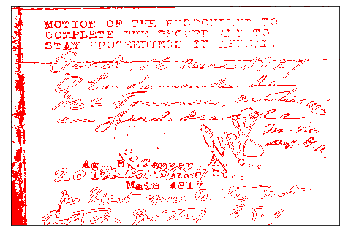

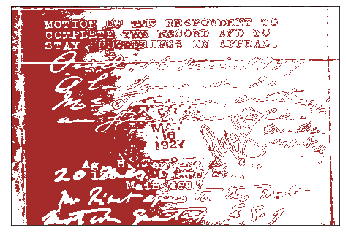

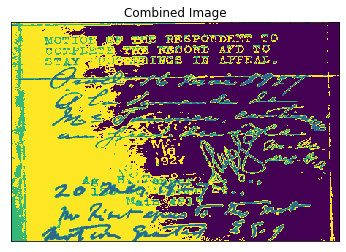

In [8]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

img = cv.imread(r'C:\Users\ATHUL VIJAY M P\Desktop\Pattern\simulation5\text1.png')
img=cv.resize(img, (450,300))
k=4
g=0,128,0
v=238,130,238
r=255,0,0
y=255,255,0
br=165,42,42
bl=0,0,255
pr=128,0,128
color=[g,v,r,br,bl,pr]
Kmimage=[]
Gmmimage=[]



data1 = img.reshape(-1, 3)
kmeans=KMeans(n_clusters=k,random_state=0).fit(data1)
print(kmeans)
label=kmeans.predict(data1)

labels=label.reshape(img[:,:,0].shape)
for i in range(k):
    im=np.copy(img)
    pixel=np.where(labels==i)
    back=np.where(labels!=i)
    im[pixel]=(color[i])
    im[back]=(255,255,255)
    Kmimage.append(im)
   
for i in range(k+1):
    figure_size = 20
    plt.figure(figsize=(figure_size,figure_size))
    plt.subplot(2,3,i+1)
    if i==4:
        plt.title("Combined Image")
        plt.imshow(labels)
    else :
        plt.imshow(Kmimage[i])
    plt.xticks([])
    plt.yticks([])

plt.show()
 
   
data2 = img.reshape(-1, 3)
gmm = GaussianMixture(n_components=k, covariance_type="tied")
gmm = gmm.fit(data2)
print(gmm)
cluster = gmm.predict(data2)
cluster=cluster.reshape(img[:,:,0].shape)

for i in range(k):
    im1=np.copy(img)
    pixel=np.where(cluster==i)
    back=np.where(cluster!=i)
    im1[pixel]=(color[i])
    im1[back]=(255,255,255)
    Gmmimage.append(im1)
for i in range(k+1):
    figure_size = 20
    plt.figure(figsize=(figure_size,figure_size))
    plt.subplot(2,3,i+1)
    if i==4:
        plt.title("Combined Image")
        plt.imshow(cluster)
    else :
        plt.imshow(Gmmimage[i])
    plt.xticks([])
    plt.yticks([])
   
plt.show()
